In [2]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [3]:
#Import dataframe
df_100pos = pd.read_csv('/Users/pandit1781/NEAT-Scouting-Data-Analytics/DataFiles/merged_df_100pos.csv', low_memory=False)

In [4]:
# Converter function for height 
def feet_to_meters(height):
    if isinstance(height, str):
        feet, inches = map(int, height.split('-'))
        total_feet = feet + inches / 12  # Convert inches to feet
        total_meters = total_feet * 0.3048  # Convert feet to meters
        return round(total_meters, 2)  # Round to 2 decimals
    else:
        return None  # Handle missing or invalid values

In [5]:
# Apply the function to convert heights
df_100pos['PLAYER_HEIGHT_METERS'] = df_100pos['HEIGHT'].apply(feet_to_meters)

In [6]:
# # Adding additional advanced metric columns

# # Shooting efficiency
# df_100pos['FG3A%'] = df_100pos['FG3A'] / df_100pos['FGA']
# df_100pos['PTS/FGA'] = df_100pos['PTS'] / df_100pos['FGA']
# df_100pos['FG3M/FGM'] = df_100pos['FG3M'] / df_100pos['FGM']
# df_100pos['FTA/FGA'] = df_100pos['FTA'] / df_100pos['FGA']

# # True Shooting Percentage
# df_100pos['TRU%'] = 0.5 * df_100pos['PTS'] / (df_100pos['FGA'] + 0.475 * df_100pos['FTA'])

# # Assists to Turnover Ratio
# df_100pos['AST_TOV'] = df_100pos['AST'] / df_100pos['TOV']

# df_100pos['POSSESSION'] = df_100pos.apply(lambda row: row['FGA'] + 0.44 * row['FTA'] - row['OREB'] + row['TOV'], axis=1)

# df_100pos[(df_100pos['PLAYER_ID'] == 1629029)]

In [7]:
# Replacing intermediary positions with one. All in all there are 3 positions - C, F and G. 
df_100pos['POSITION'] = df_100pos['POSITION'].str.replace('F-C', 'F').replace('C-F', 'C').replace('F-G', 'F').replace('G-F', 'G')

In [8]:
# European countries in wider basketball sense:
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'North Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [9]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [10]:
# New object for European players:
europe_C = filter_europe(df_100pos, 'COUNTRY', europe)
europe_C = europe_C.loc[europe_C['POSITION'].isin(['C'])]

In [11]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

In [12]:
# New object for Non-europe players playing at F in regular season games:
non_europe_C = filter_non_europe(df_100pos)
non_europe_C = non_europe_C.loc[non_europe_C['POSITION'].isin(['C'])]

In [13]:
# Check number of unique European forwards since 1996 during regular season:
europe_C.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    82
Name: PLAYER_ID, dtype: int64

In [14]:
# Check number of unique Non-European forwards since 1996 during regular season:
non_europe_C.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    346
Name: PLAYER_ID, dtype: int64

In [15]:
# Check for null values 
europe_C[['OREB', 'DREB', 'REB']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 286 to 18133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OREB    708 non-null    float64
 1   DREB    708 non-null    float64
 2   REB     708 non-null    float64
dtypes: float64(3)
memory usage: 22.1 KB


In [16]:
europe_C.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,PLAYER_HEIGHT_METERS
286,717,Arvydas Sabonis,1610612757,POR,32.0,69,43,26,0.623,51.3,9.6,19.2,0.498,1.4,3.8,0.371,6.5,8.4,0.777,3.3,12.6,15.9,4.3,4.4,1.8,2.4,1.0,5.9,0.0,27.0,1996-97,Regular Season,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21
287,717,Arvydas Sabonis,1610612757,POR,32.0,4,1,3,0.250,53.9,9.0,21.1,0.429,1.0,4.0,0.250,3.5,4.0,0.875,4.0,9.0,13.1,4.5,4.5,1.5,1.5,2.5,9.5,4.0,22.6,1996-97,Playoffs,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21
288,717,Arvydas Sabonis,1610612757,POR,33.0,73,40,33,0.548,52.1,9.1,18.5,0.493,0.7,2.6,0.261,7.2,9.1,0.798,3.3,13.0,16.3,4.9,4.2,1.5,1.8,1.0,6.0,0.0,26.1,1997-98,Regular Season,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21
289,717,Arvydas Sabonis,1610612757,POR,33.0,4,1,3,0.250,53.0,9.0,19.9,0.450,0.5,1.0,0.500,6.0,7.0,0.857,3.5,11.9,15.4,3.0,5.0,3.5,1.5,3.5,9.5,0.0,24.4,1997-98,Playoffs,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21
290,717,Arvydas Sabonis,1610612757,POR,34.0,50,35,15,0.700,53.3,9.2,18.9,0.485,0.3,0.9,0.292,5.3,6.9,0.771,3.5,12.1,15.5,4.7,3.4,1.3,2.5,1.3,5.8,0.0,23.9,1998-99,Regular Season,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21


In [17]:
max_height = europe_C[europe_C['PLAYER_HEIGHT_METERS'] > 2.20]
max_height.nunique()

PLAYER_ID                8
PLAYER_NAME              8
TEAM_ID                 13
TEAM_ABBREVIATION       13
AGE                     16
GP                      35
W                       28
L                       30
W_PCT                   39
MIN                     39
FGM                     38
FGA                     45
FG_PCT                  46
FG3M                     9
FG3A                    18
FG3_PCT                 16
FTM                     41
FTA                     44
FT_PCT                  45
OREB                    35
DREB                    43
REB                     41
AST                     31
TOV                     37
STL                     20
BLK                     30
BLKA                    23
PF                      39
PFD                     31
PTS                     44
Year                    23
Season                   2
COLLEGE                  0
COUNTRY                  7
DRAFT_YEAR               8
DRAFT_ROUND              3
DRAFT_NUMBER             8
J

In [18]:
import pandas as pd
import altair as alt

# Calculate mean and standard deviation for AVG AST for data_per_min_europe_regular
avg_ODreb_europe = europe_C.groupby('COUNTRY')[['OREB', 'DREB']].agg('mean').reset_index()

# Calculate mean and standard deviation for AVG AST for data_per_min_usa_regular
avg_ODreb_rest = non_europe_C.groupby('COUNTRY')[['OREB', 'DREB']].agg('mean').reset_index()

# Create scatter plot for data_per_min_europe_regular
scatter_europe = alt.Chart(avg_ODreb_europe).mark_circle(size=60).encode(
    x='DREB',
    y='OREB',
    tooltip=['COUNTRY', 'OREB', 'DREB'],
    color=alt.value('blue'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Mean Rebounds by European Country'
)

# Create scatter plot for rest of the world
scatter_rest = alt.Chart(avg_ODreb_rest).mark_circle(size=60).encode(
    x='DREB',
    y='OREB',
    tooltip=['COUNTRY', 'OREB', 'DREB'],
    color=alt.value('red'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Mean Rebounds by Rest of the World Countries'
)

# Concatenate the plots
scatter_europe| scatter_rest


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

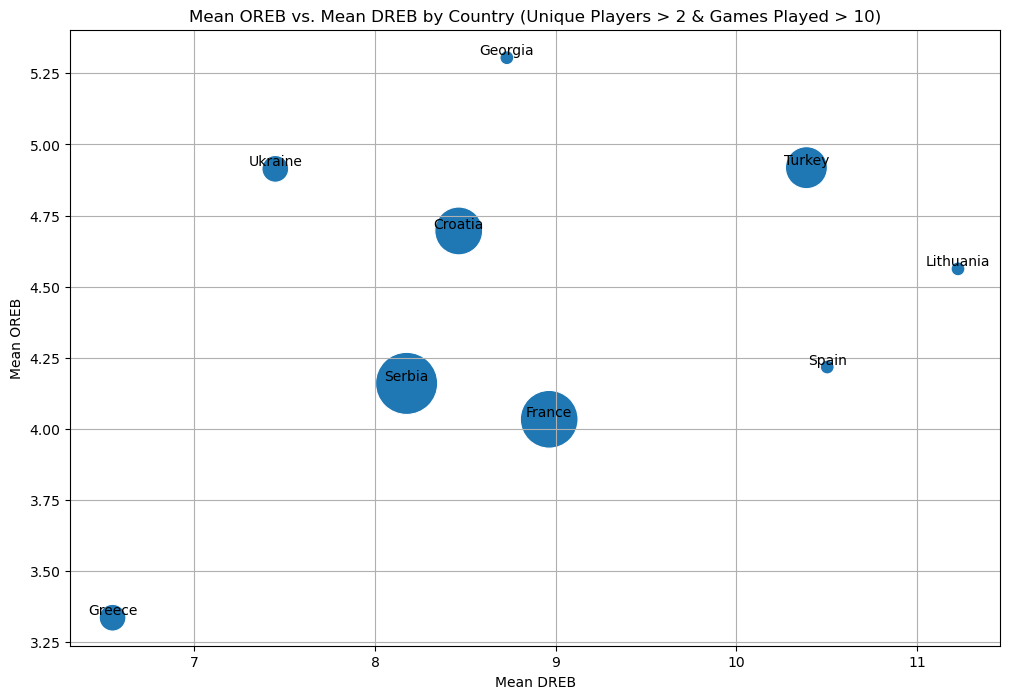

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the original dataset for players who have played more than 10 games
filtered_players = europe_C[europe_C['GP'] > 10]

# Summarize mean 'OREB' and 'DREB' for each player across all years
player_means = filtered_players.groupby(['PLAYER_NAME', 'COUNTRY'])[['OREB', 'DREB']].mean().reset_index()

# Aggregate this data by country
country_aggregates = player_means.groupby('COUNTRY').agg(
    mean_OREB=pd.NamedAgg(column='OREB', aggfunc='mean'),
    mean_DREB=pd.NamedAgg(column='DREB', aggfunc='mean'),
    unique_players=pd.NamedAgg(column='PLAYER_NAME', aggfunc='count')
).reset_index()
        

# Filter countries with more than 3 unique players
filtered_countries = country_aggregates[country_aggregates['unique_players'] > 2]

# Plotting
plt.figure(figsize=(12, 8))
bubble_sizes = filtered_countries['unique_players'] * 100  # Adjust the size for visibility
plot = sns.scatterplot(data=filtered_countries, x='mean_DREB', y='mean_OREB', size=bubble_sizes, legend=False, sizes=(100, 2000))

# Annotating each bubble with the country's name
for index, row in filtered_countries.iterrows():
    plot.text(row['mean_DREB'], row['mean_OREB'], row['COUNTRY'], color='black', ha="center", va="bottom")

plt.xlabel('Mean DREB')
plt.ylabel('Mean OREB')
plt.title('Mean OREB vs. Mean DREB by Country (Unique Players > 2 & Games Played > 10)')
plt.grid(True)
plt.show()

### Count of Centers with AVG REB > 13.0 by Country since 1996-97

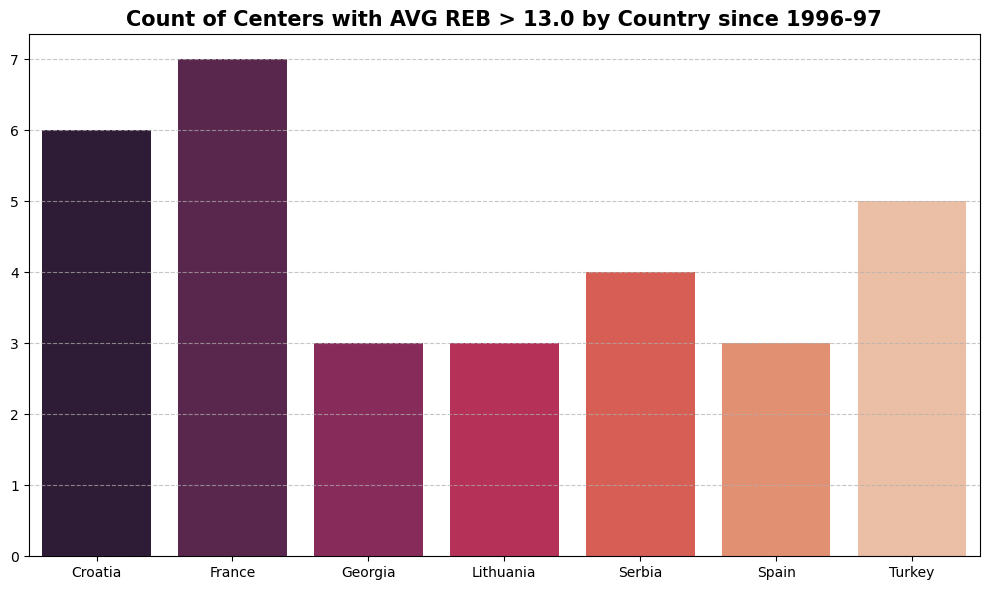

In [64]:
# Query Centers with more than 10 GP per season and above average rebounding
filter_reb = europe_C.query('GP >= 10 & REB > 13.0')[['PLAYER_ID','PLAYER_NAME', 'GP', 'OREB', 'DREB', 'REB', 'BLK', 'AST', 'COUNTRY']]
# Count number of unique players per country
filter_reb_c = filter_reb.groupby('COUNTRY')['PLAYER_NAME'].nunique().reset_index()
# Filter for countries with more than 2 players
filter_reb_c = filter_reb_c.query('PLAYER_NAME > 2')[['COUNTRY', 'PLAYER_NAME']]

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

    fig, ax = plt.subplots(figsize=(10, 6)

sns.barplot(x='COUNTRY', y="PLAYER_NAME", data=filter_reb_c, palette='rocket', linewidth=2)  # Create a count plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many countries

plt.title("Count of Centers with AVG REB > 13.0 by Country since 1996-97", fontsize=15, fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.ylim(ymin=0)        # Start y-axis at zero

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines with style

plt.tight_layout()  # Adjust spacing for better readability

plt.show()  # Display the plot

### Count of Centers with AVG Assists > 3.0 by Country since 1996-97

We learn that Top 4 European countries who supplied Centers with above average REB, BLK and AST since 1996-97 season have been:

* France
* Croatia
* Serbia
* Turkey

In [ ]:
mean_europe_oreb = avg_ODreb_europe['OREB'].mean()
mean_europe_dreb = avg_ODreb_europe['DREB'].mean()
mean_usa_oreb = avg_ODreb_rest['OREB'].mean()
mean_usa_dreb = avg_ODreb_rest['DREB'].mean()

print("Mean OREB for Europe:", mean_europe_oreb)
print("Mean DREB for Europe:", mean_europe_dreb )
print("Mean OREB for Rest of World:", mean_usa_oreb)
print("Mean DREB for Rest of World:", mean_usa_dreb)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Season count per country per player:
count_europe = europe_C.groupby('COUNTRY')['PLAYER_NAME'].nunique().reset_index()
count_europe
# fig, ax = plt.subplots(figsize=(10, 6))

# sns.barplot(x='COUNTRY', y="PLAYER_NAME", data=count_europe, palette='rocket', linewidth=2)  # Create a count plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many countries

# plt.title("Number of Centers since 1996-97 with Rebounding Data")
# plt.xlabel("Country")
# plt.ylabel("Count")
# plt.xticks(rotation=80)  # Rotate x-axis labels
# plt.ylim(ymin=0)        # Start y-axis at zero

# plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines with style

# plt.tight_layout()  # Adjust spacing for better readability

# plt.show()  # Display the plot

## Outcome:

* There are 82 Centers from 26 countries represented since 1996-97
* 13 out of 26 countries have only 1-2 unique players.
* The counts are seasons per country.
* If looking at countries with at least 5 players following are the leaders:

    Turkey, Serbia, Croatia 

* 